### Problem Statement:
### Car Price Prediction Model
### To recognize the factors affecting the selling price of cars,:

I) Which variables are influential in predicting the selling price of a car

II) How nicely variables describe the selling price of a car



In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.impute import SimpleImputer

from sklearn.metrics import mean_absolute_error as mae
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import sklearn.metrics as metrics


import pickle

In [3]:
df= pd.read_csv('Car details v3.csv')

In [4]:
df[['brand','model']]=df['name'].str.split(' ',1,expand=True)
df=df.drop(columns=['name'])

In [5]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand,model
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,Maruti,Swift Dzire VDI
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,Skoda,Rapid 1.5 TDI Ambition
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,Honda,City 2017-2020 EXi
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,Hyundai,i20 Sportz Diesel
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,Maruti,Swift VXI BSIII


In [6]:
# df=df.groupby('brand').filter(lambda x: len(x) >= 10)
df = df.query('seats <= 7')


In [7]:
df.isna().sum()

year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
brand            0
model            0
dtype: int64

In [8]:
print(df['seller_type'].unique())
print(df['transmission'].unique())
print(df['owner'].unique())
print(df['fuel'].unique())
print(df['seats'].unique())

['Individual' 'Dealer' 'Trustmark Dealer']
['Manual' 'Automatic']
['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car']
['Diesel' 'Petrol' 'LPG' 'CNG']
[5. 4. 7. 6. 2.]


In [9]:
df.columns

Index(['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats', 'brand', 'model'],
      dtype='object')

In [10]:
df.describe(include='object')

,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,brand,model
count,7571,7571,7571,7571,7571,7571,7571,7571,7571,7571
unique,4,3,2,5,387,118,315,423,30,1862
top,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,Maruti,Swift Dzire VDI
freq,3996,6247,6547,5031,225,1009,377,530,2337,129


In [11]:
df.corr().style.background_gradient()

,year,selling_price,km_driven,seats
year,1.000000,0.412426,-0.416651,0.068134
selling_price,0.412426,1.000000,-0.222673,0.081124
km_driven,-0.416651,-0.222673,1.000000,0.168496
seats,0.068134,0.081124,0.168496,1.000000


In [12]:
# df['Current_Year']=2023
# df['car_age']=df['Current_Year']-df['year']
# df.drop(columns='Current_Year', inplace=True)

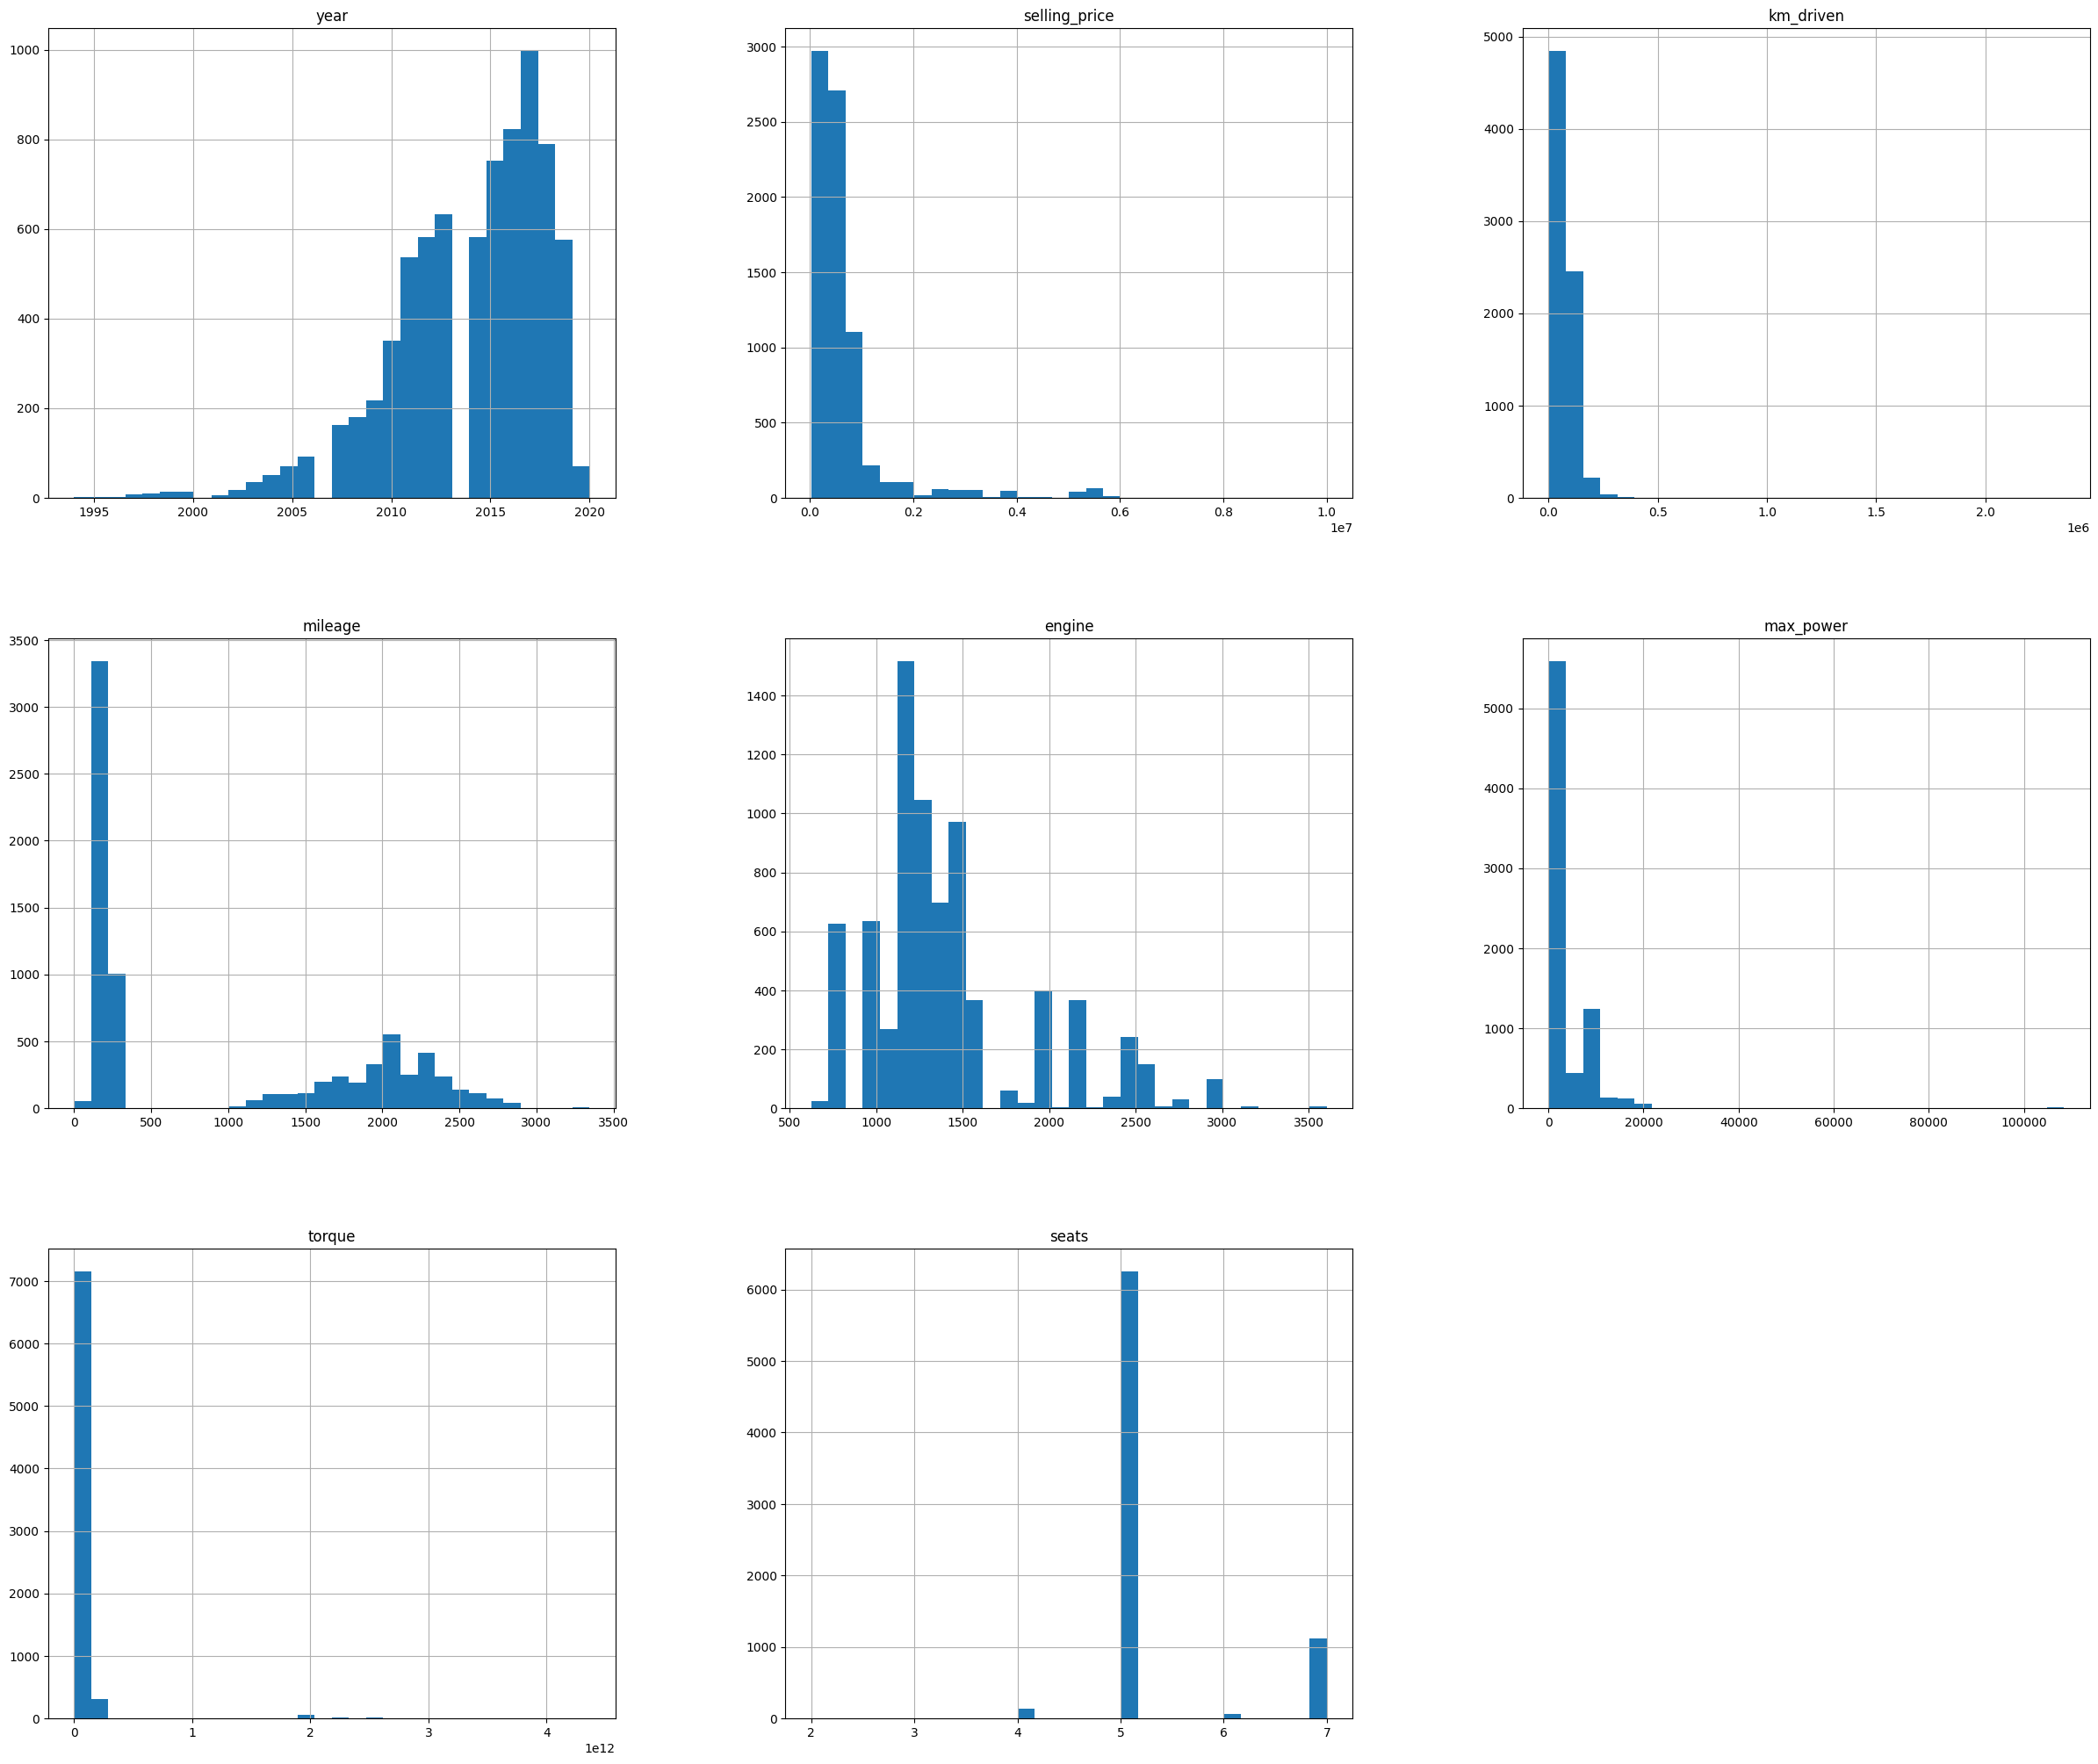

In [60]:
df.hist(figsize = (30, 25), bins = 30, legend = False)
plt.show()

In [14]:
# duplicated_val_series = df.duplicated(keep = 'last')
# df[duplicated_val_series]
# df = df[~duplicated_val_series]
# df.head()

In [15]:
def object_columns(df) : 
    o = (df.dtypes == 'object') 
    object_cols = o[o].index 
    
    return f"Categorical Columns:{object_cols}"

object_columns(df)

"Categorical Columns:Index(['fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine',\n       'max_power', 'torque', 'brand', 'model'],\n      dtype='object')"

In [16]:
def extract_num(s):
    return "".join(x for x in str(s) if x.isdigit())
df["mileage"]   = df["mileage"].map(extract_num)
df["engine"]    = df["engine"].map(extract_num)
df["max_power"] = df["max_power"].map(extract_num)
df["torque"]    = df["torque"].map(extract_num)
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand,model
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,234,1248,74,1902000,5.0,Maruti,Swift Dzire VDI
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,2114,1498,10352,25015002500,5.0,Skoda,Rapid 1.5 TDI Ambition
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,177,1497,78,1272700,5.0,Honda,City 2017-2020 EXi
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,230,1396,90,22417502750,5.0,Hyundai,i20 Sportz Diesel
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,161,1298,882,1154500,5.0,Maruti,Swift VXI BSIII


In [17]:
def str_to_num(col) :
    return pd.to_numeric(col)

df['mileage']   = df['mileage'].map(str_to_num)
df['engine']    = df['engine'].map(str_to_num)
df['max_power'] = df['max_power'].map(str_to_num)
df['torque']    = df['torque'].map(str_to_num)

In [18]:
df.head().style.background_gradient()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand,model
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,234,1248,74,1902000,5.000000,Maruti,Swift Dzire VDI
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,2114,1498,10352,25015002500,5.000000,Skoda,Rapid 1.5 TDI Ambition
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,177,1497,78,1272700,5.000000,Honda,City 2017-2020 EXi
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,230,1396,90,22417502750,5.000000,Hyundai,i20 Sportz Diesel
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,161,1298,882,1154500,5.000000,Maruti,Swift VXI BSIII


### Data Vizualization
#### 1.Top 10 expensive vehicles?
#### 2.Top 10 most expensive brand models ?
#### 2.Top 10 most powerful vehicle ?
#### 3.Top 10 highest mileage vehicle ?

In [19]:
viz_df = df.copy()

Text(0.5, 0.98, 'Car models by Selling Price')

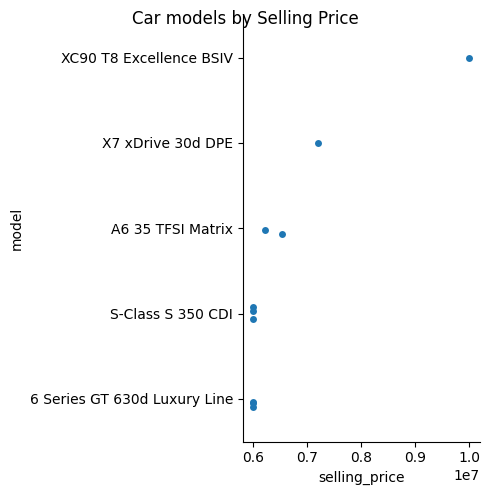

In [67]:
# Top 10 most expensive vehicle model

top_10_most_expensive_df = viz_df.sort_values(by = 'selling_price' , ascending = False) 
top_10_most_expensive_df = top_10_most_expensive_df[:10]

a1=sns.catplot(x = 'selling_price' ,  y = 'model' , data = top_10_most_expensive_df)
a1.fig.suptitle("Car models by Selling Price")

In [21]:
mean_price = df.groupby("brand")["selling_price"].mean().round(2)
max_price = mean_price.idxmax()


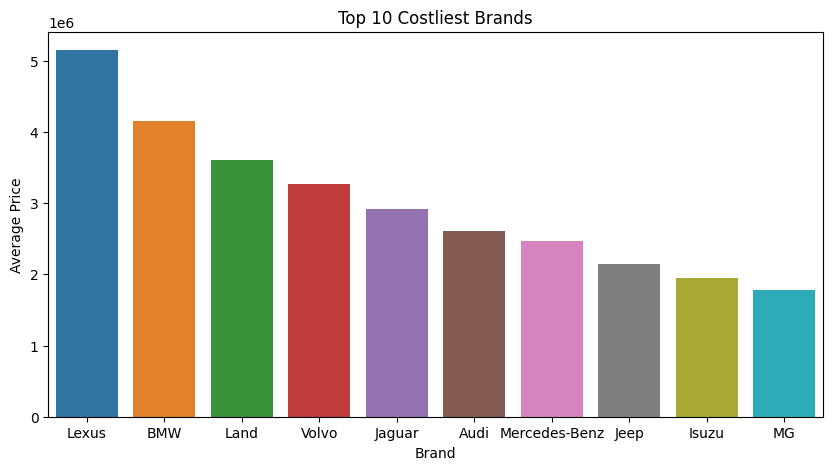

In [22]:
plt.figure(figsize=(10,5))
mean_price = df.groupby("brand")["selling_price"].mean().round().reset_index()
top_10 = mean_price.sort_values(by = 'selling_price',ascending=False).head(10)
sns.barplot(x='brand', y='selling_price', data=top_10)
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.title('Top 10 Costliest Brands')
plt.show()

Text(0.5, 0, 'Fuel Type')

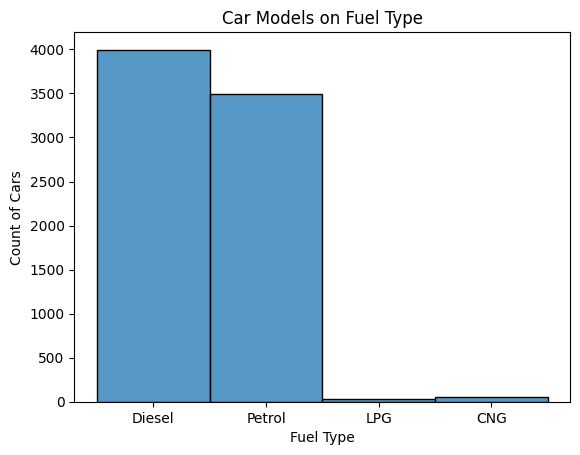

In [73]:
f_chart=sns.histplot(df['fuel'])
plt.title("Car Models on Fuel Type")
# Change y label
plt.ylabel("Count of Cars")

# Add a title
plt.xlabel("Fuel Type")

In [24]:
df.describe(include='object')

,fuel,seller_type,transmission,owner,brand,model
count,7571,7571,7571,7571,7571,7571
unique,4,3,2,5,30,1862
top,Diesel,Individual,Manual,First Owner,Maruti,Swift Dzire VDI
freq,3996,6247,6547,5031,2337,129


Text(0.5, 1.0, 'Selling Price by Fuel Type')

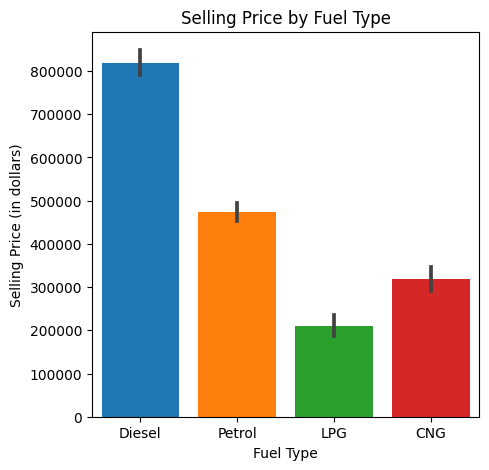

In [71]:
plt.figure(figsize = (5, 5))
sns.barplot(x = "fuel", y = "selling_price", data = df, saturation = 1)

# Change x label
plt.xlabel("Fuel Type")

# Change y label
plt.ylabel("Selling Price (in dollars)")

# Add a title
plt.title("Selling Price by Fuel Type")

C:\Users\itsma\AppData\Local\Temp\ipykernel_32520\3631248812.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.mileage)


Text(0.5, 1.0, 'Distribution of Mileage')

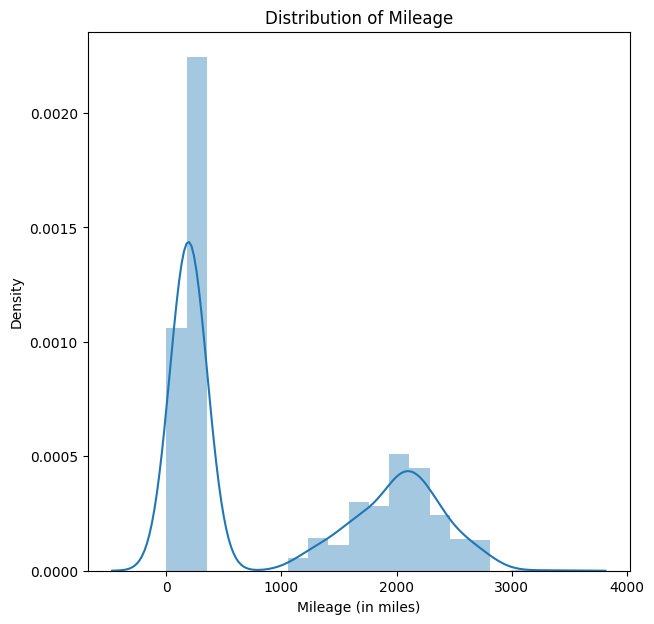

In [74]:
fig,ax = plt.subplots(figsize = (7,7))
sns.distplot(df.mileage)

# Change x label
ax.set_xlabel("Mileage (in miles)")

# Change y label
ax.set_ylabel("Density")

# Add a title
ax.set_title("Distribution of Mileage")


In [27]:
# Check unique vals in categorical columms 
def unique_cols(df) : 
    o = (df.dtypes == 'object') 
    obj_col = o[o].index 
    for i in obj_col: 
        print(f"{i} : {df[i].unique()}")
        
unique_cols(df)

fuel : ['Diesel' 'Petrol' 'LPG' 'CNG']
seller_type : ['Individual' 'Dealer' 'Trustmark Dealer']
transmission : ['Manual' 'Automatic']
owner : ['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car']
brand : ['Maruti' 'Skoda' 'Honda' 'Hyundai' 'Toyota' 'Ford' 'Renault' 'Mahindra'
 'Tata' 'Chevrolet' 'Datsun' 'Jeep' 'Mercedes-Benz' 'Mitsubishi' 'Audi'
 'Volkswagen' 'BMW' 'Nissan' 'Lexus' 'Jaguar' 'Land' 'MG' 'Volvo' 'Daewoo'
 'Kia' 'Fiat' 'Force' 'Ambassador' 'Isuzu' 'Opel']
model : ['Swift Dzire VDI' 'Rapid 1.5 TDI Ambition' 'City 2017-2020 EXi' ...
 'Manza Aura (ABS) Safire BS IV' 'Nexon 1.5 Revotorq XT'
 'Freestyle Titanium Plus Diesel BSIV']


In [28]:
def fillna_function(df) : 
    for i in df : 
        if df[i].isnull().sum() != 0 : 
            df[i].fillna(df[i].median(), inplace=True)
            
        
        
fillna_function(df)

In [29]:
df.groupby('fuel')['model','brand'].describe()

C:\Users\itsma\AppData\Local\Temp\ipykernel_32520\1250504138.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('fuel')['model','brand'].describe()


model                                    brand                     
       count unique                    top freq count unique     top  freq
fuel                                                                      
CNG       52     19        Wagon R LXI CNG   14    52      3  Maruti    47
Diesel  3996    988        Swift Dzire VDI  129  3996     25  Maruti   860
LPG       35     16  Wagon R LXI DUO BSIII    6    35      3  Maruti    19
Petrol  3488    839           Alto 800 LXI   82  3488     23  Maruti  1411

Text(0, 0.5, 'Count of Cars')

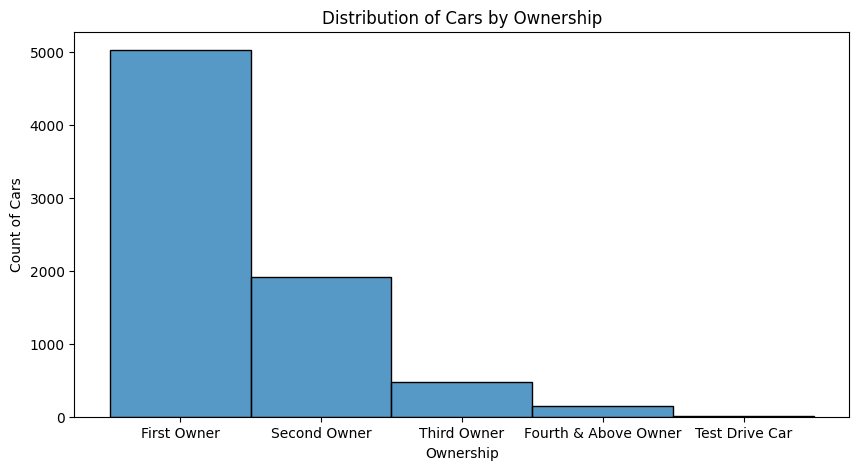

In [75]:
plt.figure(figsize=(10,5))
sns.histplot(df['owner'])

# Add a title
plt.title("Distribution of Cars by Ownership")

# Change x label
plt.xlabel("Ownership")

# Change y label
plt.ylabel("Count of Cars")

Text(0.5, 1.0, 'Count of Cars by Year of Manufacture')

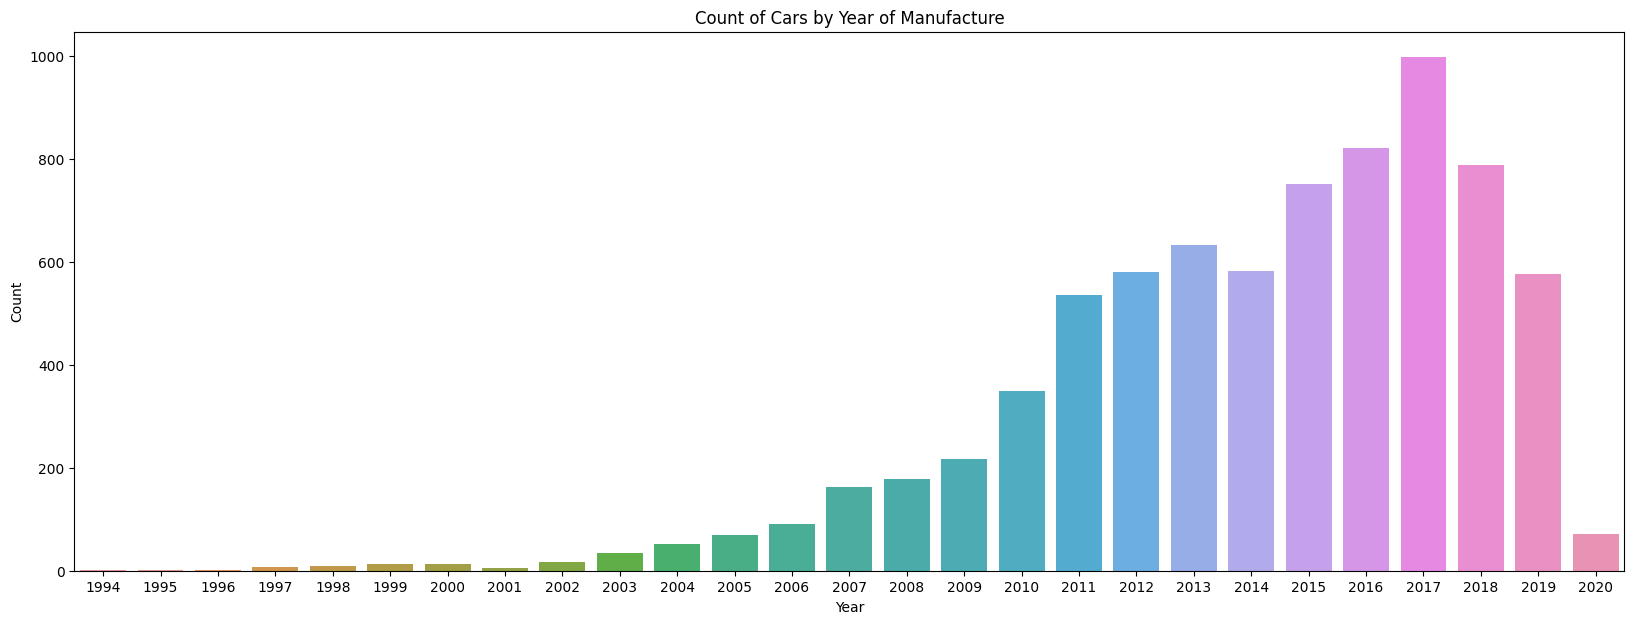

In [77]:
fig,ax = plt.subplots(figsize = (20,7))
sns.countplot(x = 'year'  ,data = df)

# Change x label
ax.set_xlabel("Year")

# Change y label
ax.set_ylabel("Count")

# Add a title
ax.set_title("Count of Cars by Year of Manufacture")

Text(0.5, 1.0, 'Count of Cars by Number of Seats')

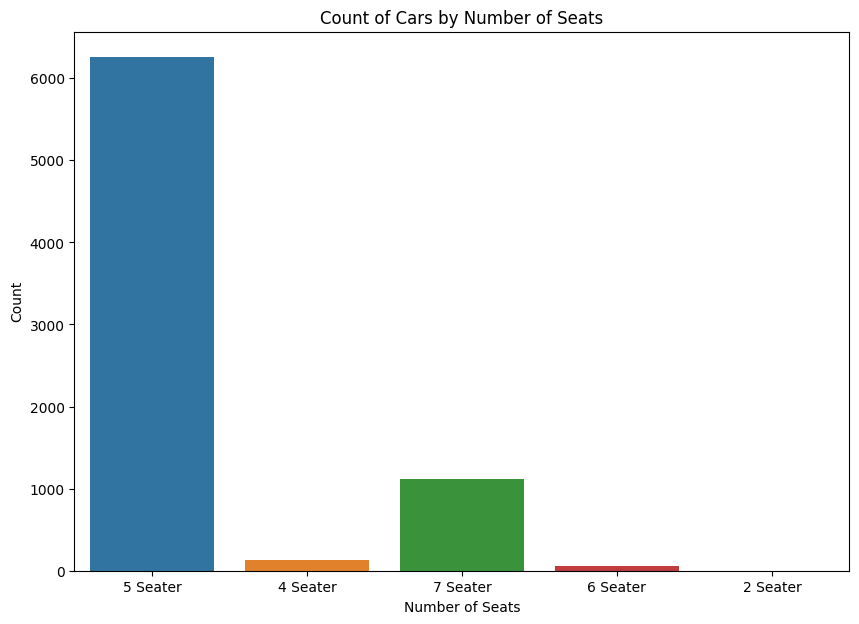

In [80]:
df["seats_label"] = df["seats"].astype(int).astype(str) + " Seater"

fig,ax = plt.subplots(figsize = (10,7))
sns.countplot(x = 'seats_label'  ,data = df)

# Change x label
ax.set_xlabel("Number of Seats")

# Change y label
ax.set_ylabel("Count")

# Add a title
ax.set_title("Count of Cars by Number of Seats")

C:\Users\itsma\AppData\Local\Temp\ipykernel_32520\19349293.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.selling_price, color='red')


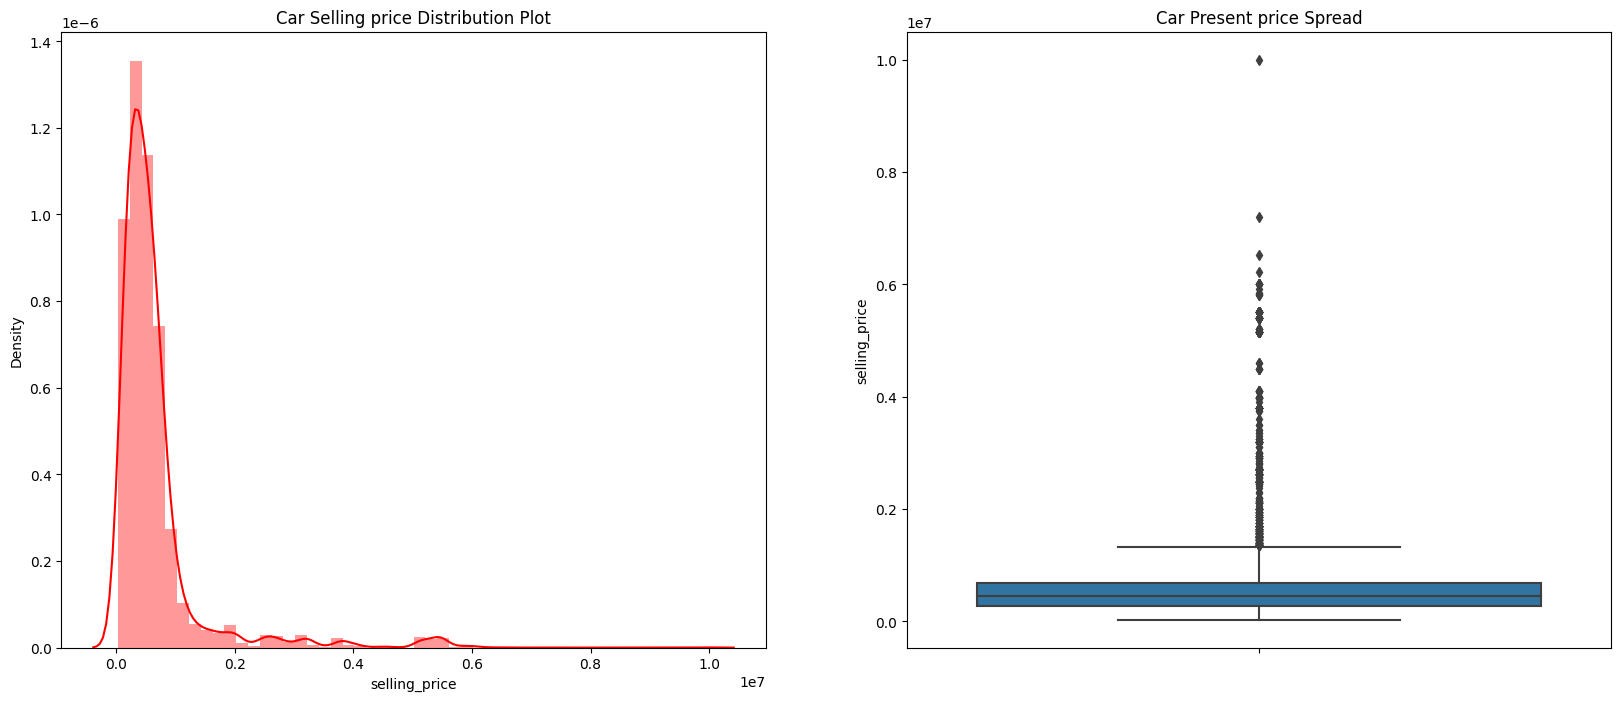

In [98]:
# Distribution
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title('Car Selling price Distribution Plot')
sns.distplot(df.selling_price, color='red')
# Spread
plt.subplot(1,2,2)
plt.title('Car Present price Spread')
sns.boxplot(y=df.selling_price)

plt.show()

### Inference:
 Most selling prices in the dataset are below 6 thousand bucks.

 There is a difference of 1079.6 bucks between the mean and median of the selling price distribution.

 The data points are far spread out from the mean, which indicates a high variance in the car selling prices. (75% of the selling prices are below 6 thousand bucks, whereas the remaining 25% are between 6 and 35 thousand bucks)

Text(0.5, 1.0, 'Correlation Heatmap')

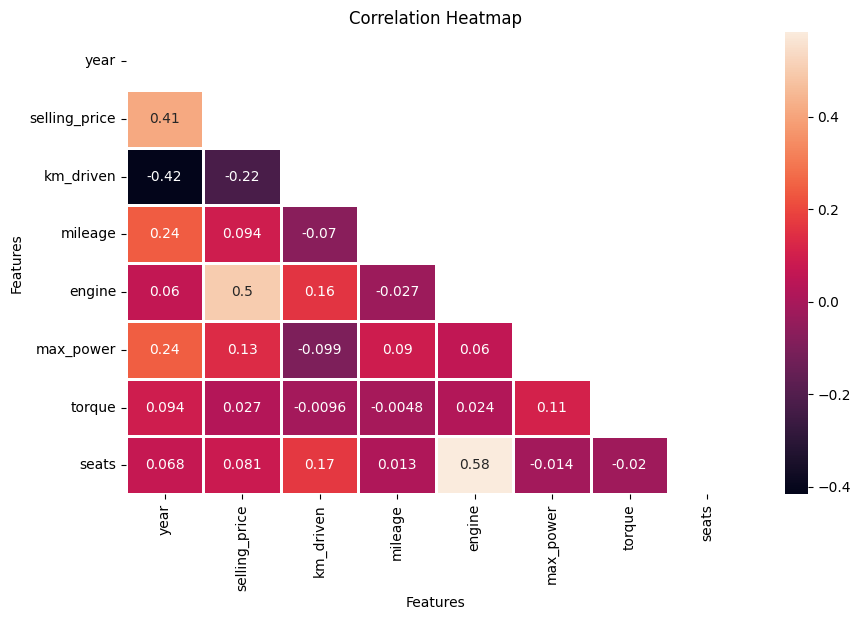

In [84]:
# Plot correlation matrix with all columms.
correlation  = df.corr()
mask = np.triu(np.ones_like(correlation , dtype = bool))
plt.figure(figsize = (10,6))
sns.heatmap(correlation , mask = mask , annot = True , linewidth = 1)
# Add x labels
plt.xlabel("Features")

# Add y labels
plt.ylabel("Features")

# Add a title
plt.title("Correlation Heatmap")

In [34]:
df1 = df.drop(['torque','model','mileage','max_power','brand'], axis = 1)
# df = df.drop(['torque'], axis = 1)

In [35]:
df1['seller_type'] = df1['seller_type'].str.replace(" ", "_")

df1['owner'] = df1['owner'].str.replace(" ", "_")

In [36]:
n_data = pd.get_dummies(df1, columns = ['fuel','seller_type','transmission','owner'])
# n_data = pd.get_dummies(df, columns = ['brand','fuel','seller_type','transmission','owner','model'])
n_data=n_data.drop(columns=['owner_Fourth_&_Above_Owner','fuel_LPG','seller_type_Trustmark_Dealer','transmission_Automatic'])


In [37]:
df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand,model
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,234,1248,74,1902000,5.0,Maruti,Swift Dzire VDI
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,2114,1498,10352,25015002500,5.0,Skoda,Rapid 1.5 TDI Ambition
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,177,1497,78,1272700,5.0,Honda,City 2017-2020 EXi
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,230,1396,90,22417502750,5.0,Hyundai,i20 Sportz Diesel
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,161,1298,882,1154500,5.0,Maruti,Swift VXI BSIII
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,Petrol,Individual,Manual,First Owner,185,1197,8285,11374000,5.0,Hyundai,i20 Magna
8124,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,168,1493,110,2419002750,5.0,Hyundai,Verna CRDi SX
8125,2009,382000,120000,Diesel,Individual,Manual,First Owner,193,1248,739,1902000,5.0,Maruti,Swift Dzire ZDi
8126,2013,290000,25000,Diesel,Individual,Manual,First Owner,2357,1396,70,14018003000,5.0,Tata,Indigo CR4


In [38]:
col = n_data.columns
imp = SimpleImputer()
n_data = pd.DataFrame(imp.fit_transform(n_data), columns = col)

In [39]:
n_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7571 entries, 0 to 7570
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    7571 non-null   float64
 1   selling_price           7571 non-null   float64
 2   km_driven               7571 non-null   float64
 3   engine                  7571 non-null   float64
 4   seats                   7571 non-null   float64
 5   fuel_CNG                7571 non-null   float64
 6   fuel_Diesel             7571 non-null   float64
 7   fuel_Petrol             7571 non-null   float64
 8   seller_type_Dealer      7571 non-null   float64
 9   seller_type_Individual  7571 non-null   float64
 10  transmission_Manual     7571 non-null   float64
 11  owner_First_Owner       7571 non-null   float64
 12  owner_Second_Owner      7571 non-null   float64
 13  owner_Test_Drive_Car    7571 non-null   float64
 14  owner_Third_Owner       7571 non-null   

In [40]:
n_data.head()

,year,selling_price,km_driven,engine,seats,fuel_CNG,fuel_Diesel,fuel_Petrol,seller_type_Dealer,seller_type_Individual,transmission_Manual,owner_First_Owner,owner_Second_Owner,owner_Test_Drive_Car,owner_Third_Owner
0,2014.0,450000.0,145500.0,1248.0,5.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
1,2014.0,370000.0,120000.0,1498.0,5.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,2006.0,158000.0,140000.0,1497.0,5.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,2010.0,225000.0,127000.0,1396.0,5.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
4,2007.0,130000.0,120000.0,1298.0,5.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0


In [41]:
X = n_data.drop(['selling_price'], axis = 1)
y = n_data['selling_price']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.20, shuffle = True, random_state = 1)

In [43]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
print('MAE Accuracy : ',mae(y_test,lr_pred))
score1 = r2_score(y_test, lr_pred)
print("The accuracy of our model is {}%".format(round(score1, 2) *100))

MAE Accuracy :  306652.2578017173
The accuracy of our model is 51.0%


In [44]:
knn_model = KNeighborsRegressor(1)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
print('MAE Accuracy : ',mae(y_test,knn_pred))
score = r2_score(y_test, knn_pred)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

MAE Accuracy :  152103.68316831684
The accuracy of our model is 80.0%


In [45]:
rf_model = RandomForestRegressor(n_estimators=50)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print('Accuracy : ',mae(y_test,rf_pred))
score3 = r2_score(y_test, rf_pred)
print("The accuracy of our model is {}%".format(round(score3, 2) *100))

Accuracy :  89075.41533429036
The accuracy of our model is 91.0%


In [46]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators = 600 ,learning_rate = .02)
xgb_model.fit(X_train, y_train, early_stopping_rounds = 5, eval_set=[(X_test, y_test)], verbose = False)
xgb_pred = xgb_model.predict(X_test)
print('Accuracy : ', mae(y_test, xgb_pred))
score4 = r2_score(y_test, xgb_pred)
print("The accuracy of our model is {}%".format(round(score4, 2) *100))

C:\Users\itsma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Accuracy :  95627.94782384488
The accuracy of our model is 91.0%


In [47]:
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, xgb_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, xgb_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, xgb_pred)))
print('R-squared: {}'.format(metrics.r2_score(y_test, rf_pred)))

Mean Absolute Error: 95627.94782384488
Mean Squared Error: 56229002022.910614
Root Mean Squared Error: 237126.55275803807
R-squared: 0.9147275594871979


Text(0.5, 1.0, 'Scatter Plot of Prediction over Actual of Selling Price')

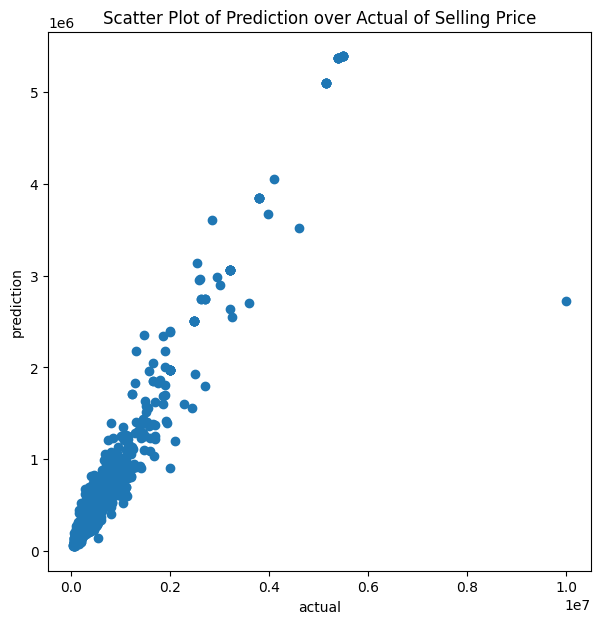

In [85]:
plt.figure(figsize=(7,7))
plt.scatter(y_test, xgb_pred)
plt.xlabel("actual")
plt.ylabel("prediction")

plt.title('Scatter Plot of Prediction over Actual of Selling Price')

C:\Users\itsma\AppData\Local\Temp\ipykernel_32520\1089600957.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(y_test-rf_pred)


Text(0.5, 1.0, 'Distribution of Prediction Accuracy density')

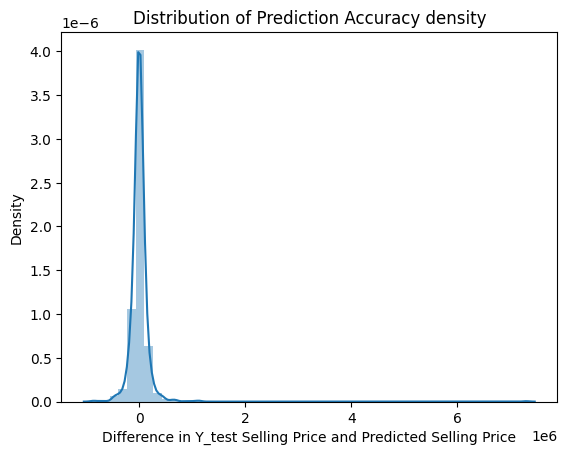

In [89]:
ax=sns.distplot(y_test-rf_pred)

# Change x label
ax.set_xlabel("Difference in Y_test Selling Price and Predicted Selling Price")

# Change y label
ax.set_ylabel("Density")

# Add a title
ax.set_title("Distribution of Prediction Accuracy density")

Text(0.5, 1.0, 'Scattered Distribution of Prediction Accuracy density')

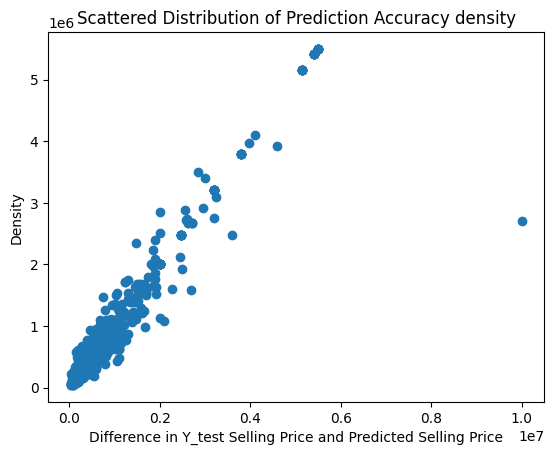

In [94]:
plt.scatter(y_test, rf_pred)
# Change x label
plt.xlabel("Difference in Y_test Selling Price and Predicted Selling Price")

# Change y label
plt.ylabel("Density")

# Add a title
plt.title("Scattered Distribution of Prediction Accuracy density")

In [51]:
#Create pickle file serial file

file1= open('xgb_model_regression_model.pkl','wb')

#dump the pickle file
pickle.dump(rf_model, file1)
file1.close()

In [52]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand,model
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,234,1248,74,1902000,5.0,Maruti,Swift Dzire VDI
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,2114,1498,10352,25015002500,5.0,Skoda,Rapid 1.5 TDI Ambition
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,177,1497,78,1272700,5.0,Honda,City 2017-2020 EXi
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,230,1396,90,22417502750,5.0,Hyundai,i20 Sportz Diesel
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,161,1298,882,1154500,5.0,Maruti,Swift VXI BSIII


In [53]:
n_data.columns

Index(['year', 'selling_price', 'km_driven', 'engine', 'seats', 'fuel_CNG',
       'fuel_Diesel', 'fuel_Petrol', 'seller_type_Dealer',
       'seller_type_Individual', 'transmission_Manual', 'owner_First_Owner',
       'owner_Second_Owner', 'owner_Test_Drive_Car', 'owner_Third_Owner'],
      dtype='object')

In [54]:
X_train.head()

,year,km_driven,engine,seats,fuel_CNG,fuel_Diesel,fuel_Petrol,seller_type_Dealer,seller_type_Individual,transmission_Manual,owner_First_Owner,owner_Second_Owner,owner_Test_Drive_Car,owner_Third_Owner
7345,2019.0,20000.0,1199.0,5.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
5771,2015.0,120000.0,1498.0,5.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
3095,2017.0,31100.0,799.0,5.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
7099,2015.0,57000.0,1248.0,5.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
5628,2014.0,65000.0,1248.0,5.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


In [55]:
# # Assign input feature values
year = 2012
km_driven = 1000
engine = 2000
seats = 5
fuel_CNG = 0
fuel_Diesel = 0
fuel_Petrol = 0
seller_type_Dealer = 1
seller_type_Individual = 0
transmission_Manual = 1
owner_First_Owner = 1
owner_Second_Owner = 0
owner_Test_Drive_Car = 0
owner_Third_Owner = 0

feature_values = [year, km_driven,	engine,	seats, fuel_CNG, fuel_Diesel, fuel_Petrol, seller_type_Dealer, seller_type_Individual,	transmission_Manual, owner_First_Owner,	owner_Second_Owner,	owner_Test_Drive_Car, owner_Third_Owner]

prediction = rf_model.predict([feature_values])


C:\Users\itsma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [56]:
# Round the prediction to 2 decimal places and store it in a variable

output = round(prediction[0], 2)
output

619133.33

In [57]:
# # one-hot encode categorical variables
# enc = OneHotEncoder(handle_unknown='ignore')
# encoded_X = enc.fit_transform(make1_values)
# encoded_X_df = pd.DataFrame(encoded_X.toarray(), columns=enc.get_feature_names(['make1']))

In [58]:
# import pandas as pd
# from sklearn.ensemble import RandomForestRegressor


# # example training data
# X1 = pd.DataFrame({'year1': [2010, 2011, 2012, 2013, 2014],
#                   'mileage1': [100000, 80000, 90000, 110000, 105000],
#                   'make1': ['Toyota', 'Honda', 'Toyota', 'Honda', 'Toyota']})
# y1 = [10000, 12000, 13000, 14000, 15000]

# # one-hot encode categorical variables
# enc = OneHotEncoder(handle_unknown='ignore')


In [59]:
# make1_values = X1[['make1']]
# print(make1_values)
# encoded_X = enc.fit_transform(make1_values)
# encoded_X_df = pd.DataFrame(encoded_X.toarray(), columns=enc.get_feature_names(['make1']))
# X1 = pd.concat([X1, encoded_X_df], axis=1)
# X1 = X1.drop(['make1'], axis=1)
# # train the model
# regr = RandomForestRegressor(random_state=0)
# regr.fit(X1, y1)

# # feature values to make predictions on
# X_new = pd.DataFrame({'year1': [2015],
#                       'mileage1': [95000],
#                       'make1_Toyota': [1],
#                       'make1_Honda': [0]})

# # make predictions
# prediction = regr.predict(X_new)
# prediction